In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
from collections import Counter
from tqdm.notebook import tqdm
import joblib
from kiwipiepy import Kiwi
from collections import Counter
from tqdm.notebook import tqdm
from wordcloud import WordCloud
from PIL import Image
import networkx as nx
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Load

In [2]:
fnames = glob.glob('ÏïÑÌîÑÎãàÍπåÏÇ¨Ïû•Ïù¥Îã§/*.csv')
dfs = [pd.read_csv(fname) for fname in fnames]
dfs_size = {fname.split('Ïπ¥ÌéòÍ≤åÏãúÌåê_')[1].split('.csv')[0] : len(df) for fname, df in zip(fnames, dfs)}
df = pd.concat(dfs)

In [361]:
len(df), len(fnames)

(115407, 20)

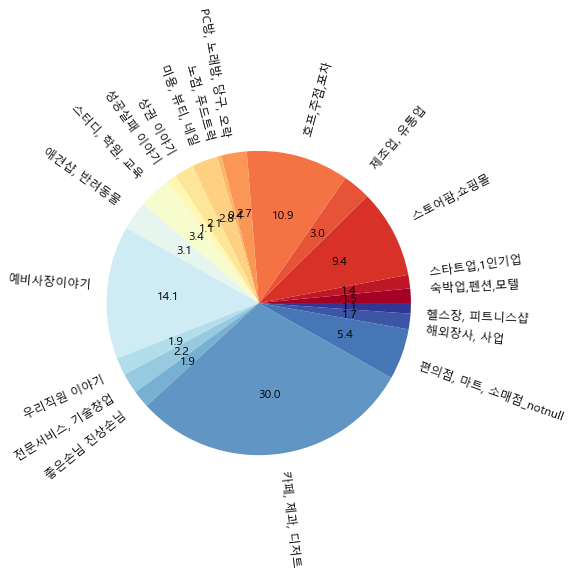

In [99]:
plt.figure(figsize=(16, 8))
pd.Series(dfs_size).plot.pie(autopct='%.1f', cmap=plt.cm.RdYlBu, fontsize=12, rotatelabels = True)
# plt.title('Í≤åÏãúÌåêÎ≥Ñ ÏàòÏßëÎêú Í≤åÏãúÍ∏Ä ÎπÑÏ§ë', size=20)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [185]:
df_refined = df.dropna()[~df.dropna().content.str.contains('ÏûòÎÇòÍ∞ÄÍ≤å')] #ÏûòÎÇòÍ∞ÄÍ≤å ÌôçÎ≥¥ Ï†úÏô∏

In [187]:
#Î¨∏Ïû• ÎπàÎèÑ ÌôïÏù∏+
counter = Counter()

for content in tqdm(df_refined.content):
    counter.update(content.split('\n'))

  0%|          | 0/114920 [00:00<?, ?it/s]

In [247]:
# check1
[(key, val) for key, val in sorted(counter.items(), key=lambda x: x[1], reverse=True) if val > 1]

[('', 774431),
 ('\u200b', 189164),
 ('\xa0', 93113),
 (' ', 90612),
 ('... ÎçîÎ≥¥Í∏∞', 8799),
 ('ÏûêÏòÅÏóÖÏûê ÌïÑÏàò Ïñ¥ÌîåÎ¶¨ÏºÄÏù¥ÏÖò Îã§Ïö¥Î∞õÍ∏∞', 7969),
 ('Ïä§ÌÜ†Ïñ¥Ìåú ÌíàÏïóÏù¥ Í∏àÏßÄ - Í∏Ä Ïò¨Î¶¨Ïãú ÌôúÎèôÏ†ïÏßÄ ', 6017),
 (' (Î©îÎâ¥Ïóê Î≥¥ÏãúÎ©¥ Ïä§ÌÜ†Ïñ¥Ìåú ÌíàÏïóÏù¥ Ïπ¥Ìéò ÎßÅÌÅ¨ ÏûàÏäµÎãàÎã§. Í∑∏Í≥≥ÏóêÏÑú Ìï¥Ï£ºÏãúÎ©¥ Í∞êÏÇ¨ÌïòÍ≤†ÏäµÎãàÎã§.)', 6017),
 ('.', 3815),
 ('Ïä§ÌÑ∞Îîî Ïπ¥Ìéò Í≤åÏãúÌåêÏóê Í±∞ÏßìÌõÑÍ∏∞Î°ú Í∏∞ÎßåÌïòÎäî ÏÇ¨ÎûåÎì§ÏùÄ ', 2782),
 (' ÏôºÏ™Ω Î©îÎâ¥ ÌïòÎã®Ïóê "Ïã†Í≥†ÌïòÍ∏∞"Í≤åÏãúÌåêÏóê Ïã†Í≥† Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§. ', 2782),
 ('ÏûêÍ∏∞ Ï†Ñ Ïπ®ÎåÄÏóêÏÑú ÏïÑÏã∏Ïπ¥ÌéòÎ•º Ï¶êÍ∏∞Îäî Î∞©Î≤ï', 2713),
 ('ÏïàÎÖïÌïòÏÑ∏Ïöî', 2022),
 ('Ïò§ÎäòÏùòÎ™ÖÏñ∏', 1984),
 ('Î≥µÏÇ¨', 1692),
 ('ÎèÑÏõÄÎßê', 1687),
 ('ÏûêÏã†Í∞êÏùÄ ÏúÑÎåÄÌïú Í≥ºÏóÖÏùò Ï≤´Ïß∏ ÏöîÍ±¥Ïù¥Îã§.', 1635),
 ('-Samuel Johnson-', 1635),
 ('ÏïàÎÖïÌïòÏÑ∏Ïöî.', 1618),
 (', ', 1347),
 ('3Ïõî\xa0Ïã†Í∑ú ÏÉµÏù∏ÏÉµÏïÑÏù¥ÌÖú\xa0 Î≥¥Í∏∞', 1234),
 ('. ', 1191),
 ('Îπ†Î•∏ ÏãúÏùº ÎÇ¥Ïóê Ï∞ΩÏóÖÏóê Ïã§Ìå®ÌïòÎäî Í≤ΩÏö∞Îäî ÎåÄÎ∂ÄÎ∂Ñ

In [220]:
# check2
temp = [(key, val) for key, val in sorted(counter.items(), key=lambda x: x[1], reverse=True) if 'Ï™ΩÏßÄ' in key and val > 1]
print(len(temp))
temp

264


[('Ï™ΩÏßÄÎ°ú ÌåêÎß§ÌïòÏã§ ÌíàÎ™©Í≥º', 47),
 ('Ï™ΩÏßÄÏ£ºÏÑ∏Ïöî', 47),
 ('Ï™ΩÏßÄ Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§.', 35),
 ('Ï™ΩÏßÄÎ°ú ÌåêÎß§ÌïòÏã§ ÌíàÎ™©Í≥º Ïó∞ÎùΩÏ≤ò Ï£ºÏÑ∏Ïöî', 29),
 ('Ï™ΩÏßÄ Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§', 28),
 ('Ï™ΩÏßÄ Ï£ºÏÑ∏Ïöî', 27),
 ('Ï™ΩÏßÄÎ°ú ÌåêÎß§ÌïòÏã§ ÌíàÎ™©Í≥º Ïó∞ÎùΩÏ≤ò ÎÇ®Í≤®Ï£ºÏÑ∏Ïöî^^', 24),
 ('Ï™ΩÏßÄÏ£ºÏÑ∏Ïöî!', 14),
 ('Ï™ΩÏßÄÎ∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§', 13),
 ('Ï™ΩÏßÄÎ°ú Ïó∞ÎùΩÏ≤ò ÎÇ®Í≤® Ï£ºÏãúÎ©¥ ÌôïÏù∏ ÌõÑ Ïó∞ÎùΩ ÎìúÎ¶¨Í≤†ÏäµÎãàÎã§.', 13),
 ('Ï™ΩÏßÄÏ£ºÏÑ∏Ïöî.', 13),
 ('Ï™ΩÏßÄ Î∂ÄÌÉÅÎìúÎ†§Ïöî', 13),
 ('Ï™ΩÏßÄ Ï£ºÏÑ∏Ïöî.', 13),
 ('Ïó∞ÎùΩ(Ï™ΩÏßÄ, ÎåìÍ∏Ä)Ïù¥ Ïò§Îäî Í≤ΩÏö∞Í∞Ä ÎßéÏäµÎãàÎã§. ', 13),
 ('Î¨∏ÏùòÎäî ÎåìÍ∏Ä ÎòêÎäî Ï™ΩÏßÄÎ°ú ', 12),
 ('Ïó∞ÎùΩÏ≤ò ‚ñ∂ *Í∏∞Ïû¨Í∏àÏßÄ* ÎÑ§Ïù¥Î≤Ñ Ï™ΩÏßÄ Í∏∞Îä•ÏúºÎ°ú Ï£ºÍ≥† Î∞õÏúºÏÑ∏Ïöî (Ïó∞ÎùΩÏ≤ò Í∏∞Ïû¨Ïãú Í∏Ä ÏÇ≠Ï†ú) ', 12),
 ('Ï™ΩÏßÄÎ∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§.', 11),
 ('Ï™ΩÏßÄÎ∂ÄÌÉÅÎìúÎ†§Ïöî', 10),
 ('Ï™ΩÏßÄÏ£ºÏÑ∏Ïöî^^', 9),
 ('Îß§ÏûÖÎã®Í∞ÄÎäî Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÏúºÏÖîÏïº Ï±ÖÏ†ïÎêòÎãà  Ï™ΩÏßÄÎ°ú ÌåêÎß§ÌïòÏã§ ÌíàÎ™©Í≥º Ï†ÑÎ≤à ÎÇ®Í≤®Ï£ºÏÑ∏Ïöî', 9),
 ('Ï™ΩÏßÄÏ

In [252]:
# Ï†úÏô∏Ìï† Î¨∏Ïû•Îì§
stopwords = [k for k, v in counter.items() if v > 1 
             and 'Ïö¥ÏòÅÏ§ë' not in k 
             and 'Ï°∞Ïñ∏' not in k
             and 'ÏïÑÏãúÎäî' not in k
             and 'ÏßÄÏó≠ÏùÄ' not in k
             and 'Ï¢ãÏùÑ' not in k
             and 'ÎèÑÏôÄÏ£ºÏÑ∏' not in k
            ]
print(len(stopwords))

texts = df_refined.content.to_list()

# stopwords Ï†úÍ±∞
texts_nonstop = []
for text in tqdm(texts):
    texts_nonstop.append('\n'.join([t for t in text.split('\n') if t not in stopwords]))
    
# joblib.dump(texts_nonstop, 'texts_nonstop.list')

  0%|          | 0/114920 [00:00<?, ?it/s]

In [4]:
kiwi = Kiwi()
texts_nonstop = joblib.load('texts_nonstop.list')

In [9]:
#tokenizing
docs = []
for result in tqdm(kiwi.analyze(texts_nonstop), total=len(texts_nonstop)):
    docs.append(result[0][0])

  0%|          | 0/114920 [00:00<?, ?it/s]

In [8]:
#ÏõêÌïòÎäî ÌíàÏÇ¨Îßå Ï∂îÏ∂ú
tokenizedDocs = [[token.form for token in doc if token.tag[:2] in ['NN', 'VV', 'VA'] and token.len > 1] for doc in docs ]
# joblib.dump(tokenizedDocs, 'tokenizedDocs.list')

In [19]:
tokenizedDocs = joblib.load('tokenizedDocs.list')

In [372]:
df_refined['tokens'] = tokenizedDocs
df_refined['ym'] = df_refined['date'].apply(lambda x: x[:8])
df_refined['quarter'] = df_refined['ym'].apply(lambda x: x[:4]+ '-'+str((int(x[-3:-1])-1)//3 + 1))
# df_refined.to_csv('df_refined_NN_VV_VA.csv', index=False)

In [6]:
df_refined = pd.read_csv('df_refined_NN_VV_VA.csv')
df_refined['tokens'] = df_refined['tokens'].apply(lambda x: eval(x))

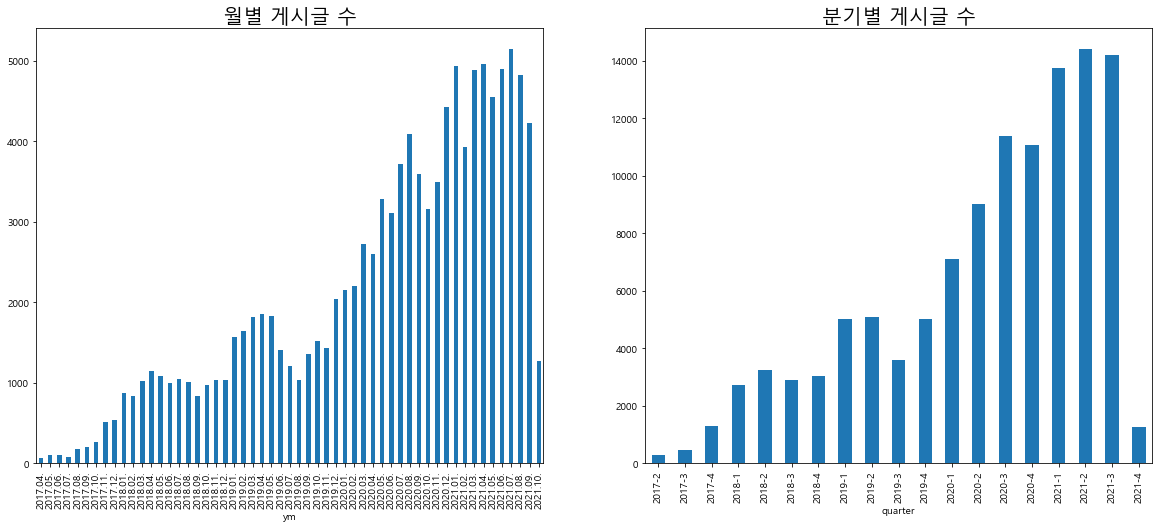

In [12]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
df_refined.groupby('ym')['id'].count().plot.bar()
plt.title('ÏõîÎ≥Ñ Í≤åÏãúÍ∏Ä Ïàò', size=20)

plt.subplot(1, 2, 2)
df_refined.groupby('quarter')['id'].count().plot.bar()
plt.title('Î∂ÑÍ∏∞Î≥Ñ Í≤åÏãúÍ∏Ä Ïàò', size=20)
plt.show()

In [88]:
df_refined

id                            title         date  view  like  \
0       1060939  Î≥¥ÌÜµ ÏûêÍ∏∞ Îò•ÏúºÎ°ú ÎßâÌûå Î≥ÄÍ∏∞Îäî ÏûêÍ∏∞Í∞Ä Îö´ÏúºÎ†§ ÌïòÏßÄ ÏïäÎÇòÏöî  2021.10.08.   420     0   
1       1060927                        Í∞úÎØ∏ ÏóÜÏï†Îäî Î∞©Î≤ï  2021.10.08.   141     2   
2       1060671             Í¥ëÏ£º Í∑ºÏ≤ò ÎÜÄÎ†§Í∞àÎßêÌïú ÏΩòÎèÑ ÏóÜÏùÑÍπåÏöî?  2021.10.08.   134     1   
3       1059729           ÏñºÎ£© Í≥ºÌÉÑÏÇ∞ÏúºÎ°úÎèÑ ÏïàÏßÄÏõåÏßÄÎ©¥ ÎãµÏóÜÏùÑÍπåÏöî?  2021.10.07.    96     0   
4       1059720          Î™®ÌÖîÏóê ÏïàÎßàÏùòÏûêÎÇò Ïä§ÌÉÄÏùºÎü¨ ÎÜìÏùå Ïñ¥Îñ®ÍπåÏöî?  2021.10.07.   495     1   
...         ...                              ...          ...   ...   ...   
114915   270092                   ÏöîÍ∞ÄÏÑºÌÑ∞ ÏÉµÏù∏ÏÉµ ÏïÑÏù¥ÎîîÏñ¥!  2019.05.09.   618     0   
114916   265432               ÏöîÍ∞Ä ÏÉ§ÏõåÏã§ Í≥†ÎØºÏ§ë ÎèÑÏôÄÏ£ºÏÑ∏Ïöî^^  2019.04.28.   407     0   
114917   230936                   Ìó¨Ïä§Ïû• ÏãúÏûëÌïòÎ†§ Ìï©ÎãàÎã§..  2019.02.08.  1189     1   
114918   191774                 ÌïÑÎùºÌÖåÏä§ ÏöîÍ∞Ä ÏóÖÍ≥Ñ Í≥ÑÏã†Î∂ÑÎì§~  2018.10.22.  1619     1   
114919   180495              ÏöîÏ¶ò Ìó¨Ïä§Ïû• Ïö¥ÏòÅ Ïñ¥Îñ†ÌïòÏã†ÏßÄÏöî?„Ö†„Ö†  2018.09.18.   675     0   

        noComment                                            content  \
0               8  Î™®ÌÖî Ïö¥ÏòÅÏ§ëÏûÖÎãàÎã§.\nÎ≥¥ÌÜµ ÏÜêÎãòÎì§ÏùÑ Î≥¥Î©¥ ÏûêÍ∏∞Í∞Ä ÎßâÌûàÍ≤å Ìïú Î≥ÄÍ∏∞Îäî Îã§ ÏûêÍ∏∞Í∞Ä Ï≤òÎ¶¨Ìï¥...   
1               4  Î™®ÌÖîÏù∏Îç∞ Í∞ùÏã§Ïóê ÏûêÍæ∏ Í∞úÎØ∏Îì§Ïù¥ ÎÇòÏôÄÏÑú\nÏÜêÎãòÎì§Ïù¥ Î∂àÎßå Í∞ÄÏ°åÏóàÏñ¥Ïöî.\nÍ∑∏ÎûòÏÑú Ïù¥Î∞©Î≤ï ...   
2               5     Ï†ÑÎùºÎèÑ Í¥ëÏ£º ÏÇ¥ÏïÑÏöî\nÍ¥ëÏ£º ÎßêÍµ¨Ïöî\nÍ¥ëÏ£º Í∑ºÍµêÎ°ú Ìï¥ÏÑú ÎÜÄÎü¨Í∞àÎßåÌïú \nÏΩòÎèÑ ÏóÜÏùÑÍπåÏöî?   
3               2  Ïù¥Î∂àÏù¥ÎÇò ÏãúÌä∏Ïª§Î≤ÑÏóê Î≠ê Î¨ªÏùÄÍ±∞\nÎú®Í±∞Ïö¥Î¨ºÏóê Í≥ºÌÉÑÏÇ∞Ìï¥ÎèÑ ÏïàÏßÄÏõåÏßÄÎ©¥ ÎãµÏóÜÍ≤†Ï£†?„Ö†„Ö†\nÌòπ...   
4              17  Í∞ùÏã§ ÏïàÎßàÏùòÏûêÎÇò Ïä§ÌÉÄÏùºÎü¨Í∞Ä Îß§Ï∂úÏóê ÏñºÎßàÎÇò ÎèÑÏõÄÏù¥ Îê†ÍπåÏöî?\nÏÑ†ÌÉùÏãúÏóê Ï¢Ä Îçî Í≥†Î†§ÌïòÎ†§...   
...           ...                                                ...   
114915          6  ÏöîÍ∞ÄÏÑºÌÑ∞ ÎÇ¥ ÏÉµÏù∏ÏÉµÏùÑ Îì§Ïó¨Î≥¥Î†§Í≥† Ìï©ÎãàÎã§.\n¬†\nÎ™®Îëê Í∞ôÏùÄÍ≥†ÎØºÏù¥ÏãúÍ≤†ÏßÄÎßå\nÍ±¥Î¨º ÏûÑÎåÄ...   
114916          7  ÏöîÍ∞Ä Ïù∏ÌÖåÎ¶¨Ïñ¥ Ï§ÄÎπÑÏ§ë ÏûÖÎãàÎã§.\nÏÉ§ÏõåÏã§ ÎïåÎ¨∏Ïóê Í≥†ÎØºÏ§ë ÏûÖÎãàÎã§.\nÏ†úÍ∞Ä ÏïåÏïÑÎ≥¥Îãà Ï°∞Î¶Ω...   
114917         30  (Í∏ÄÏãúÏûë)\nÏïàÎÖïÌïòÏÑ∏Ïöî ÏòàÎπÑÏÇ¨Ïû•ÏûÖÎãàÎãπ„Öé\nÎ≥¥Ï¶ùÍ∏à 6000 ÏõîÏÑ∏ 350Ïóê\nÍ∂åÎ¶¨ÏóÜÏù¥ ...   
114918         27  Í∏∞Íµ¨ÌïÑÎùºÌÖåÏä§ÏÑºÌÑ∞ Ïù∏ÏàòÌïúÏßÄ Ïó¥ÌùòÎêêÏäµÎãàÎã§-\nÌîÑÎûúÏ∞®Ïù¥Ï¶àÎùº Îß§ÎãàÏ†Ä.Í∞ïÏÇ¨.Ïö¥ÏòÅÏ≤¥Í≥Ñ Í∑∏ÎåÄÎ°ú ...   
114919          3  ÏöîÏÉà Îã§Îì§ Î∂àÍ≤ΩÍ∏∞ÎùºÍ≥† ÌïòÎäîÎç∞\nÌó¨Ïä§Ïû• Ïö¥ÏòÅÌïòÏãúÎäî ÏÇ¨Ïû•ÎãòÎì§\nÏöîÏ¶ò Ìó¨Ïä§Ïû• Ïö¥ÏòÅÏù¥ Ïñ¥Îñ†...   

                                                   tokens        ym quarter  
0       [Î™®ÌÖî, Ïö¥ÏòÅ, ÎßâÌûà, Î≥ÄÍ∏∞, Ï≤òÎ¶¨, Í∑∏Î†á, Î≥¥Ïù¥, Î∂ÄÎÅÑÎüΩ, Ìá¥Ïã§, ÎßâÌûà, Í≤ΩÏö∞, ...  2021.10.  2021-4  
1       [Î™®ÌÖî, Í∞ùÏã§, Í∞úÎØ∏, ÎÇòÏò§, Î∂àÎßå, Í∞ÄÏßÄ, Î∞©Î≤ï, Î∞©Î≤ï, Îß•Ïä§, Ìè¨Ïä§, ÌÄÄÌÖÄ, Í∞ú...  2021.10.  2021-4  
2                                   [Ï†ÑÎùºÎèÑ, Í¥ëÏ£º, Í¥ëÏ£º, Í¥ëÏ£º, Í∑ºÍµê]  2021.10.  2021-4  
3               [Ïù¥Î∂à, ÏãúÌä∏, Ïª§Î≤Ñ, Îú®Í≤Å, Í≥ºÌÉÑÏÇ∞Ìï¥, Î∞©Î≤ï, Ïïå, Í≥ÑÏãú, ÏïåÎ¶¨, Î≤ÑÎ¶¨]  2021.10.  2021-4  
4       [Í∞ùÏã§, ÏïàÎßà, ÏùòÏûê, Ïä§ÌÉÄÏùºÎü¨, Îß§Ï∂ú, ÎèÑÏõÄ, ÏÑ†ÌÉù, Í≥†Î†§ÌïòÎ†§, Í≥†ÎØº, ÏùòÍ≤¨, Î∂Ä...  2021.10.  2021-4  
...                                                   ...       ...     ...  
114915  [ÏöîÍ∞Ä, ÏÑºÌÑ∞, ÏÉµÏù∏ÏÉµ, Îì§Ïù¥, Í≥†ÎØº, Í±¥Î¨º, ÏûÑÎåÄÎ£å, Í¥ÄÎ¶¨ÎπÑ, ÏßÅÏõê, Ïù∏Í±¥ÎπÑ, ÎÑ§...  2019.05.  2019-2  
114916  [ÏöîÍ∞Ä, Ïù∏ÌÖåÎ¶¨Ïñ¥, Ï§ÄÎπÑ, ÏÉ§ÏõåÏã§, ÎïåÎ¨∏, Í≥†ÎØº, ÏïåÏïÑÎ≥¥, Ï°∞Î¶Ω, ÏÉ§Ïõå, Î∂ÄÏä§, Í≥µ...  2019.04.  2019-2  
114917  [ÏïàÎÖï, ÏòàÎπÑÏÇ¨Ïû•ÏûÖÎãà, Î≥¥Ï¶ùÍ∏à, ÏõîÏÑ∏, Í∂åÎ¶¨, Ï≤òÏùå, Ïù∏ÌÖåÎ¶¨Ïñ¥, ÏãúÏûë, Ïù∏ÌÖåÎ¶¨Ïñ¥, ...  2019.02.  2019-1  
114918  [Í∏∞Íµ¨ÌïÑÎùºÌÖåÏä§, ÏÑºÌÑ∞, Ïù∏Ïàò, Ïó¥Ìùò, ÌîÑÎûúÏ∞®Ïù¥Ï¶à, Îß§ÎãàÏ†Ä, Í∞ïÏÇ¨, Ïö¥ÏòÅ, Ï≤¥Í≥Ñ, Í∞Ä...  2018.10.  2018-4  
114919        

### ÏµúÍ∑ºÏù¥Ïäà

In [121]:
# ÏµúÍ∑º textsÎßå Ï∂îÏ∂ú
lateTexts = [txt for txt, tf in zip(texts_nonstop, df_refined.ym>'2021') if tf == True]
#tokenizing
lateDocs = []
for result in tqdm(kiwi.analyze(lateTexts), total=len(lateTexts)):
    lateDocs.append(result[0][0])

#ÌíàÏÇ¨Ï∂îÏ∂ú
lateTokenizedDocs = [[token.form for token in doc if token.tag[:2] in ['NN'] and token.len > 1] for doc in lateDocs ]

# ÌÜ†ÌÅ∞DF
lateCounter = Counter()
for tokens in lateTokenizedDocs:
    lateCounter.update(tokens)

  0%|          | 0/43651 [00:00<?, ?it/s]

In [122]:
max_ = max(lateCounter.values())
min_ = min(lateCounter.values())
lateCounter = [(k, (v-min_)/(max_-min_)) for k, v in lateCounter.items()]
lateCounter = sorted(lateCounter, key=lambda x: x[1], reverse=True)
lateCounter

[('ÏÉùÍ∞Å', 1.0),
 ('Ï†ïÎèÑ', 0.887957454479899),
 ('ÏÇ¨Ïû•', 0.8561384532179557),
 ('Ïπ¥Ìéò', 0.8375698575806743),
 ('ÏãúÍ∞Ñ', 0.6296196142058771),
 ('Îß§Ï∂ú', 0.5986118622678925),
 ('Ïö¥ÏòÅ', 0.5794122949341987),
 ('Îß§Ïû•', 0.5466919055345232),
 ('Í∞ÄÍ≤å', 0.5413737155219037),
 ('ÌåêÎß§', 0.5361456643230575),
 ('Ïò§Ìîà', 0.5359653866955111),
 ('ÏóÖÏ≤¥', 0.5024337479718767),
 ('ÏÇ¨Îûå', 0.49134667387777176),
 ('Î∂ÄÌÉÅ', 0.49008473048494683),
 ('Í∞ÄÎä•', 0.43933657833062917),
 ('ÏãúÏûë', 0.4115738236884803),
 ('Î∞∞Îã¨', 0.39688119704344693),
 ('Ï∞ΩÏóÖ', 0.3903912024517757),
 ('ÏÇ¨Ïö©', 0.3841716243014242),
 ('Ï§ÄÎπÑ', 0.3632594195060393),
 ('Ïò§Îäò', 0.35767081305210024),
 ('Í≤ΩÏö∞', 0.35658914728682173),
 ('Í≥†Í∞ù', 0.3500991526951505),
 ('Ï†úÌíà', 0.3314404182440959),
 ('ÏÇ¨ÏóÖÏûê', 0.32594195060393005),
 ('ÏΩîÎ°úÎÇò', 0.322065981611682),
 ('Ïû•ÏÇ¨', 0.3151252929511448),
 ('Ï£ºÎ¨∏', 0.3129619614205877),
 ('Í≥†ÎØº', 0.3111591851451235),
 ('Ïù¥ÏÉÅ', 0.30656210564268976),
 ('Ïª§Ìîº', 0

In [111]:
df_refined[df_refined.ym<'2020']

id                                   title         date  view  \
1432    375879  Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ ÏÇ¨Ïû•ÎãòÎì§ Ïä§ÌÖù Í≥†Ïö©, ÏÖÄÌîÑÏ≤¥ÌÅ¨Ïù∏ Ïñ¥Îñ°Ìï¥ ÌïòÍ≥† Í≥ÑÏãúÎÇòÏöî??  2019.12.28.   433   
1433    375649       ÏàôÎ∞ïÏãúÏÑ§ Îß§ÏàòÌõÑ Î¶¨Î™®Îç∏ÎßÅ Î™©Ï†ÅÏùò ÏûêÍ∏àÎåÄÏ∂ú Ïñ¥ÎñªÍ≤å Ìï¥ÏïºÌïòÎÇòÏöî?  2019.12.28.   434   
1434    375574                    Ïó¨Í∏∞ ÌéúÏÖòÏù∏Îç∞ Ïù¥Í±∞ Ïπ¥Î©îÎùº ÏïÑÎãåÍ∞ÄÏöî?  2019.12.27.  3690   
1435    375442                            Ìé∏ÏÖò ÏÇ¨Ïû•Îãò  ÏßàÎ¨∏Ïöî!  2019.12.27.   383   
1436    374926       Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ ÏùºÏàúÏù¥Ïùµ 20Ïî© ÏÉùÍ∏∞Î†§Î©¥ ÌïòÎ£®Î™áÎ™Ö Î∞õÏïÑÏïºÌïòÎÇòÏöî?  2019.12.26.  1256   
...        ...                                     ...          ...   ...   
114915  270092                          ÏöîÍ∞ÄÏÑºÌÑ∞ ÏÉµÏù∏ÏÉµ ÏïÑÏù¥ÎîîÏñ¥!  2019.05.09.   618   
114916  265432                      ÏöîÍ∞Ä ÏÉ§ÏõåÏã§ Í≥†ÎØºÏ§ë ÎèÑÏôÄÏ£ºÏÑ∏Ïöî^^  2019.04.28.   407   
114917  230936                          Ìó¨Ïä§Ïû• ÏãúÏûëÌïòÎ†§ Ìï©ÎãàÎã§..  2019.02.08.  1189   
114918  191774                        ÌïÑÎùºÌÖåÏä§ ÏöîÍ∞Ä ÏóÖÍ≥Ñ Í≥ÑÏã†Î∂ÑÎì§~  2018.10.22.  1619   
114919  180495                     ÏöîÏ¶ò Ìó¨Ïä§Ïû• Ïö¥ÏòÅ Ïñ¥Îñ†ÌïòÏã†ÏßÄÏöî?„Ö†„Ö†  2018.09.18.   675   

        like  noComment                                            content  \
1432       0          5  Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ ÏÇ¨Ïû•ÎãòÎì§\nÏä§ÌÖù Í≥†Ïö© Ïñ¥Îñ°Ìï¥ ÌïòÍ≥† Í≥ÑÏãúÎÇòÏöî???\n¬†\nÏõîÍ∏âÏ≤¥Ï†úÎ°ú Îß§Îãà...   
1433       1          2  ÏàôÎ∞ïÏãúÏÑ§ Ïö¥ÏòÅÏóê Í¥ÄÏã¨ÏûàÏñ¥ÏÑú Îß§ÏàòÎ•º ÌïòÎ†§Í≥† Ïó¥Ïã¨Ìûà Í≥µÎ∂ÄÌïòÍ≥† ÏïåÏïÑÎ≥¥Îäî Ï§ë ÏûÖÎãàÎã§.¬†\n...   
1434       2         43  Í∞ëÏûêÍ∏∞ Ï≤úÏû•ÏùÑ Î≥¥ÎäîÎç∞ ÎÇòÎ•º ÏßÄÏºúÎ≥¥Îäî Ïù¥ÎÖÄÏÑù·Ü¢\nÎ∂àÎÅÑÍ≥† Ïù¥Í±∏ Ï∞çÏúºÎãà Ï¥àÎ°ùÏÉâ Î∂àÏù¥ Îì§Ïñ¥...   
1435       0         10  Í∞ÑÎã®Ìûà ÏÑ§Î™ÖÌï†ÍªòÏöî\nÌéúÏÖò ÏòàÏïΩ\nÏã§ÎÇ¥ÏóêÏÑú Í≥†Í∏∞ Íµ¨Ïö∞Î©¥ÏïàÎêúÎãµÎãàÎã§\n„Öá„Öã„Öá„Öã¬†¬†\nÏù¥Ìï¥...   
1436       0          9  Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Ï∞ΩÏóÖ ÏßÄÎßùÏÉùÏûÖÎãàÎã§^^(inÎèÑÏã¨)\nÏÑ†Î∞∞ÎãòÎì§Íªò ÏûêÎ¨∏ Íµ¨ÌïòÍ≥†Ïûê Î¨∏ÏùòÍ∏Ä Ïò¨Î¶Ω...   
...      ...        ...                                                ...   
114915     0          6  ÏöîÍ∞ÄÏÑºÌÑ∞ ÎÇ¥ ÏÉµÏù∏ÏÉµÏùÑ Îì§Ïó¨Î≥¥Î†§Í≥† Ìï©ÎãàÎã§.\n¬†\nÎ™®Îëê Í∞ôÏùÄÍ≥†ÎØºÏù¥ÏãúÍ≤†ÏßÄÎßå\nÍ±¥Î¨º ÏûÑÎåÄ...   
114916     0          7  ÏöîÍ∞Ä Ïù∏ÌÖåÎ¶¨Ïñ¥ Ï§ÄÎπÑÏ§ë ÏûÖÎãàÎã§.\nÏÉ§ÏõåÏã§ ÎïåÎ¨∏Ïóê Í≥†ÎØºÏ§ë ÏûÖÎãàÎã§.\nÏ†úÍ∞Ä ÏïåÏïÑÎ≥¥Îãà Ï°∞Î¶Ω...   
114917     1         30  (Í∏ÄÏãúÏûë)\nÏïàÎÖïÌïòÏÑ∏Ïöî ÏòàÎπÑÏÇ¨Ïû•ÏûÖÎãàÎãπ„Öé\nÎ≥¥Ï¶ùÍ∏à 6000 ÏõîÏÑ∏ 350Ïóê\nÍ∂åÎ¶¨ÏóÜÏù¥ ...   
114918     1         27  Í∏∞Íµ¨ÌïÑÎùºÌÖåÏä§ÏÑºÌÑ∞ Ïù∏ÏàòÌïúÏßÄ Ïó¥ÌùòÎêêÏäµÎãàÎã§-\nÌîÑÎûúÏ∞®Ïù¥Ï¶àÎùº Îß§ÎãàÏ†Ä.Í∞ïÏÇ¨.Ïö¥ÏòÅÏ≤¥Í≥Ñ Í∑∏ÎåÄÎ°ú ...   
114919     0          3  ÏöîÏÉà Îã§Îì§ Î∂àÍ≤ΩÍ∏∞ÎùºÍ≥† ÌïòÎäîÎç∞\nÌó¨Ïä§Ïû• Ïö¥ÏòÅÌïòÏãúÎäî ÏÇ¨Ïû•ÎãòÎì§\nÏöîÏ¶ò Ìó¨Ïä§Ïû• Ïö¥ÏòÅÏù¥ Ïñ¥Îñ†...   

                                                   tokens        ym quarter  
1432    [Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§, ÏÇ¨Ïû•, Ïä§ÌÖù, Í≥†Ïö©, Í≥ÑÏãú, ÏõîÍ∏â, Ï≤¥Ï†ú, Îß§ÎãàÏ†Ä, ÏÉÅÏ£º, Ïä§ÌÖù, ...  2019.12.  2019-4  
1433    [ÏàôÎ∞ï, ÏãúÏÑ§, Ïö¥ÏòÅ, Í¥ÄÏã¨, Îß§Ïàò, Í≥µÎ∂Ä, ÏïåÏïÑÎ≥¥, ÎÖ∏ÌõÑ, ÏàôÎ∞ï, ÏãúÏÑ§, Îß§Ïàò, ...  2019.12.  2019-4  
1434    [Ï≤úÏû•, ÏßÄÏºúÎ≥¥, ÎÖÄÏÑù, Ï¥àÎ°ùÏÉâ, Îì§Ïñ¥Ïò§, ÏõÉÍ∏∞, ÏßÄÍ∏à, Îì§Ïñ¥Ïò§, Ïî®Ïî®Ìã∞Î∏å, Ïò§Î•¥,...  2019.12.  2019-4  
1435    [ÏÑ§Î™Ö, ÌéúÏÖò, ÏòàÏïΩ, Ïã§ÎÇ¥, Í≥†Í∏∞, ÍµΩ, Ïù¥Ìï¥, Í∞ÄÎä•, ÌÖåÎùºÏä§, Ï†ÑÍ∏∞, Í∑∏Îü¨, Ïñ¥...  2019.12.  2019-4  
1436    [Í≤åÏä§Ìä∏, ÌïòÏö∞Ïä§, Ï∞ΩÏóÖ, ÏßÄÎßù, ÎèÑÏã¨, ÏÑ†Î∞∞, ÏûêÎ¨∏, Íµ¨Ìïò, Î¨∏Ïùò, Ïò¨Î¶¨, ÏùºÏàú,...  2019.12.  2019-4  
...                                                   ...       ...     ...  
114915  [ÏöîÍ∞Ä, ÏÑºÌÑ∞, ÏÉµÏù∏ÏÉµ, Îì§Ïù¥, Í≥†ÎØº, Í±¥Î¨º, ÏûÑÎåÄÎ£å, Í¥ÄÎ¶¨ÎπÑ, ÏßÅÏõê, Ïù∏Í±¥ÎπÑ, ÎÑ§...  2019.05.  2019-2  
114916  [ÏöîÍ∞Ä, Ïù∏ÌÖåÎ¶¨Ïñ¥, Ï§ÄÎπÑ, ÏÉ§ÏõåÏã§, ÎïåÎ¨∏, Í≥†ÎØº, ÏïåÏïÑÎ≥¥, Ï°∞Î¶Ω, ÏÉ§Ïõå, Î∂ÄÏä§, Í≥µ...  2019.04.  2019-2  
114917  [ÏïàÎÖï, ÏòàÎπÑÏÇ¨Ïû•ÏûÖÎãà, Î≥¥Ï¶ùÍ∏à, ÏõîÏÑ∏, Í∂åÎ¶¨, Ï≤òÏùå, Ïù∏ÌÖåÎ¶¨Ïñ¥, ÏãúÏûë, Ïù∏ÌÖåÎ¶¨Ïñ¥, ...  2019.02.  2019-1  
1

In [136]:
earlyTexts = [d for d, tf in zip(tokenizedDocs, df_refined.ym>'2021') if tf == False]

# ÌÜ†ÌÅ∞DF
earlyCounter = Counter()
for tokens in earlyTexts:
    earlyCounter.update(tokens)
    
max_ = max(earlyCounter.values())
min_ = min(earlyCounter.values())
earlyCounter = {k: (v-min_)/(max_-min_) for k, v in earlyCounter.items()}
sorted(earlyCounter.items(), key=lambda x: x[1], reverse=True)

[('ÏÉùÍ∞Å', 1.0),
 ('Ï†ïÎèÑ', 0.9438565549676661),
 ('Ïπ¥Ìéò', 0.7995786792083088),
 ('ÎìúÎ¶¨', 0.7960023515579071),
 ('ÏÇ¨Ïû•', 0.7938957475994513),
 ('Í∞ÄÍ≤å', 0.5911228689006467),
 ('Ïö¥ÏòÅ', 0.5831863609641388),
 ('Ï∞ΩÏóÖ', 0.5525671173819322),
 ('ÏãúÍ∞Ñ', 0.5384577699392514),
 ('Î∂ÄÌÉÅ', 0.5352243778169704),
 ('Îß§Ïû•', 0.5103860474230845),
 ('ÌåêÎß§', 0.5010288065843621),
 ('ÎÇòÏò§', 0.4872623946698021),
 ('ÏÇ¨Îûå', 0.48417597491671566),
 ('Îß§Ï∂ú', 0.47565157750342935),
 ('Ïò§Ìîà', 0.47408387223202036),
 ('ÏóÖÏ≤¥', 0.4684989222026259),
 ('Ïñ¥Îñª', 0.4593376445228297),
 ('ÏãúÏûë', 0.4329316088575348),
 ('Ï§ÄÎπÑ', 0.42592592592592593),
 ('Î™®Î•¥', 0.41965510484029),
 ('Í∞ÄÎä•', 0.39800117577895355),
 ('ÎßåÎì§', 0.3942288849696257),
 ('Ïû•ÏÇ¨', 0.3830589849108368),
 ('Í≥ÑÏãú', 0.3492063492063492),
 ('Ïïå', 0.34543405839702135),
 ('ÏÇ¨Ïö©', 0.3398980991573584),
 ('ÌûòÎì§', 0.33769351361943956),
 ('Í∑∏Î†á', 0.3370566333529296),
 ('Í∞ÄÏßÄ', 0.3122672937487752),
 ('Í≤ΩÏö∞', 0.310258671

In [127]:
mask = np.array(Image.open('cloud.png'))
plt.figure(figsize=(16, 10))
wc = WordCloud(font_path='C:/Users/82105/Downloads/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf',
                background_color='white', 
               width=1600, height=600, 
               relative_scaling=0.7,
                colormap=plt.cm.Accent, mask=mask[100:-130, 130:-130, 0])
wc = wc.generate_from_frequencies({k : v for k, v in lateCounter[4:]})
plt.imshow(wc, interpolation='bilinear')
plt.title('2021ÎÖÑ Ïù¥ÌõÑ Î™ÖÏÇ¨ÌÜ†ÌÅ∞ WordCloud', size=20)
plt.axis('off')
plt.tight_layout()
plt.show()

In [137]:
mask = np.array(Image.open('cloud.png'))
plt.figure(figsize=(16, 10))
wc = WordCloud(font_path='C:/Users/82105/Downloads/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf',
                background_color='white', 
               width=1600, height=600, 
               relative_scaling=0.7,
                colormap=plt.cm.Accent, mask=mask[100:-130, 130:-130, 0])
wc = wc.generate_from_frequencies(earlyCounter)
plt.imshow(wc, interpolation='bilinear')
plt.title('2021ÎÖÑ Ïù¥Ï†Ñ Î™ÖÏÇ¨ÌÜ†ÌÅ∞ WordCloud', size=20)
plt.axis('off')
plt.tight_layout()
plt.show()

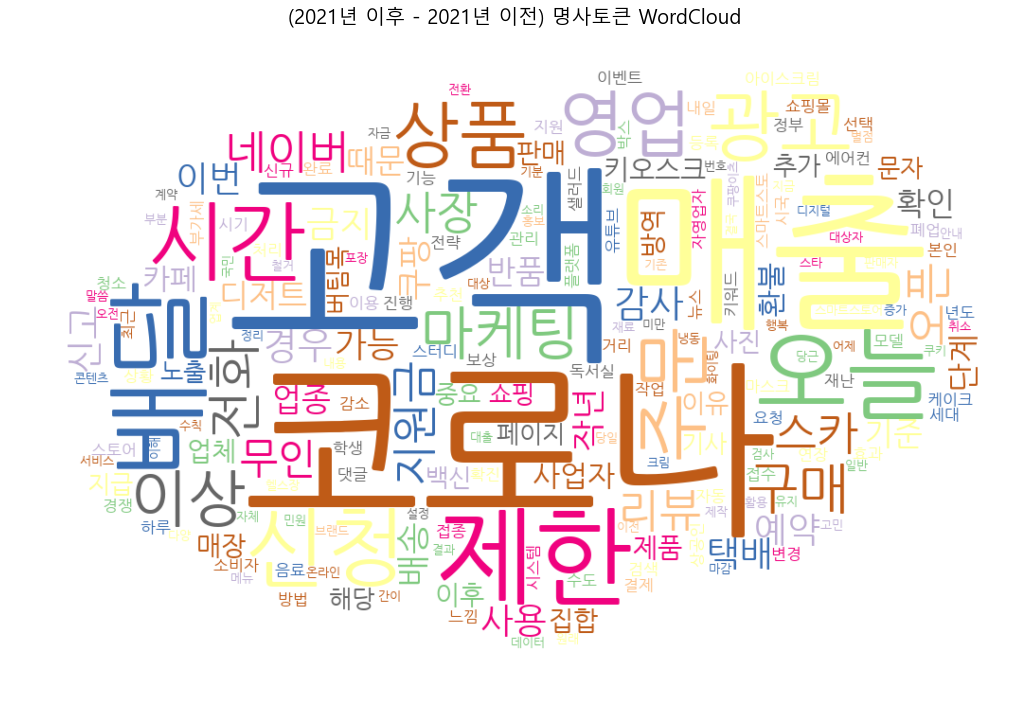

In [149]:
gap = {k : v-earlyCounter.get(k, 0) for k, v in lateCounter} 
mask = np.array(Image.open('cloud.png'))
plt.figure(figsize=(16, 10))
wc = WordCloud(font_path='C:/Users/82105/Downloads/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf',
                background_color='white', 
               width=1600, height=600, 
               relative_scaling=0.7,
                colormap=plt.cm.Accent, mask=mask[100:-130, 130:-130, 0])
wc = wc.generate_from_frequencies(gap)
plt.imshow(wc, interpolation='bilinear')
plt.title('(2021ÎÖÑ Ïù¥ÌõÑ - 2021ÎÖÑ Ïù¥Ï†Ñ) Î™ÖÏÇ¨ÌÜ†ÌÅ∞ WordCloud', size=20)
plt.axis('off')
plt.tight_layout()
plt.show()

In [101]:
%%time
# ÏõîÎ≥Ñ ÌÜ†ÌÅ∞Ïàò ÏÑ∏Í∏∞
def countTokens(tokenSeries):
    global tokens
    counter = Counter()
    for tokens in tokenSeries:
        counter.update(set(tokens))
#     max_ = max(counter.values())
#     sum_ = sum(counter.values())
    total = len(tokenSeries) # Í≤åÏãúÍ∏ÄÏàòÎ°ú Ï†ïÍ∑úÌôî
    ret = [(k, v/total) for k, v in counter.items() if v/total > 0.005] #Ìï¥ÎãπÏãúÏ¶å ÎπÑÏú®Î°ú Ï†ïÍ∑úÌôî
    return ret 

def mergeDf(groupToken):
    df_token = pd.DataFrame()
    for idx, name in enumerate(groupToken.index):
        df_temp = pd.DataFrame(groupToken[idx], columns=['token', f'prop_{name.replace(".", "")}'])
        if df_token.empty:
            df_token = df_temp
        else:
            df_token = pd.merge(df_token, df_temp, on='token', how='outer')
    return df_token.fillna(0)

def sortRank(groupMerge):
    ranking = groupMerge.sum(axis=1).rank(method='first').reset_index().sort_values(0,ascending=False).index #Ï†ÑÏ≤¥ÎπÑÏú®Ïùò Ìï©ÏúºÎ°ú ÏàúÏúÑÎß§ÍπÄ
    groupMerge = groupMerge.iloc[ranking].reset_index(drop=True)    
    return groupMerge.set_index('token')

monthlyToken = df_refined.query('"2018" < ym < "2021.10"').groupby('ym')['tokens'].apply(lambda x: countTokens(x))
quarterToken = df_refined.query('"2018" < ym < "2021.10"').groupby('quarter')['tokens'].apply(lambda x: countTokens(x))
monthlyMerge= mergeDf(monthlyToken)
quarterMerge= mergeDf(quarterToken)

Wall time: 4.01 s


In [103]:
quarterMerge.set_index('token')

prop_2018-1  prop_2018-2  prop_2018-3  prop_2018-4  prop_2019-1  \
token                                                                    
Ï†ïÎèÑ        0.189901     0.216450     0.192958     0.165411     0.175850   
Îß§Ï∂ú        0.081229     0.086580     0.079392     0.071078     0.067237   
Î∂ÄÌÉÅÎìúÎ¶¨      0.028174     0.029375     0.039696     0.041598     0.030237   
Ïö¥ÏòÅ        0.124771     0.125850     0.123921     0.124140     0.118759   
Í¥úÏ∞Æ        0.057446     0.081014     0.067311     0.068457     0.055500   
...            ...          ...          ...          ...          ...   
Ï†ëÏ¢Ö        0.000000     0.000000     0.000000     0.000000     0.000000   
Í≤ΩÏ∞∞        0.000000     0.000000     0.000000     0.000000     0.000000   
Î∞±Ïã†        0.000000     0.000000     0.000000     0.000000     0.000000   
Ïû•Í∏∞        0.000000     0.000000     0.000000     0.000000     0.000000   
Ï†ÑÎûµ        0.000000     0.000000     0.000000     0.000000     0.000000   

       prop_2019-2  prop_2019-3  prop_2019-4  prop_2020-1  prop_2020-2  \
token                                                                    
Ï†ïÎèÑ        0.179724     0.183984     0.194572     0.164528     0.158432   
Îß§Ï∂ú        0.076969     0.074259     0.090002     0.083604     0.078050   
Î∂ÄÌÉÅÎìúÎ¶¨      0.036024     0.033804     0.027340     0.029466     0.026757   
Ïö¥ÏòÅ        0.118307     0.112497     0.132309     0.097702     0.104918   
Í¥úÏ∞Æ        0.064961     0.077030     0.073039     0.058367     0.062729   
...            ...          ...          ...          ...          ...   
Ï†ëÏ¢Ö        0.000000     0.000000     0.000000     0.000000     0.000000   
Í≤ΩÏ∞∞        0.000000     0.000000     0.000000     0.000000     0.000000   
Î∞±Ïã†        0.000000     0.000000     0.000000     0.000000     0.000000   
Ïû•Í∏∞        0.000000     0.000000     0.000000     0.000000     0.000000   
Ï†ÑÎûµ        0.000000     0.000000     0.000000     0.000000     0.000000   

       prop_2020-3  prop_2020-4  prop_2021-1  prop_2021-2  prop_2021-3  
token                                                                   
Ï†ïÎèÑ        0.150526     0.150627     0.142037     0.154604     0.142364  
Îß§Ï∂ú        0.072018     0.081266     0.083697     0.083409     0.083011  
Î∂ÄÌÉÅÎìúÎ¶¨      0.027105     0.025616     0.026446     0.030740     0.025417  
Ïö¥ÏòÅ        0.103509     0.114368     0.106292     0.103393     0.091460  
Í¥úÏ∞Æ        0.055877     0.060702     0.058413     0.065228     0.057734  
...            ...          ...          ...          ...          ...  
Ï†ëÏ¢Ö        0.000000     0.000000     0.000000     0.000000     0.007322  
Í≤ΩÏ∞∞        0.000000     0.000000     0.000000     0.000000     0.005562  
Î∞±Ïã†        0.000000     0.000000     0.000000     0.000000     0.009998  
Ïû•Í∏∞        0.000000     0.000000     0.000000     0.000000     0.005281  
Ï†ÑÎûµ        0.000000     0.000000     0.000000     0.000000     0.006055  

[1350 rows x 15 columns]

In [360]:
plt.figure(figsize=(8, 6))
plt.title('tokenÏùò Î∂ÑÌè¨Î°ú ÌôïÏù∏Ìïú Î∂ÑÍ∏∞Î≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', size=20)
sns.heatmap(quarterMerge.set_index('token').corr(), cmap=plt.cm.Blues_r, alpha=0.95)
plt.show()
print('ÏΩîÎ°úÎÇò Ï†Ñ/ÌõÑÏóê Îî∞Îùº ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞íÏù¥ Ï∞®Ïù¥Í∞Ä ÎÇ®')

ÏΩîÎ°úÎÇò Ï†Ñ/ÌõÑÏóê Îî∞Îùº ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞íÏù¥ Ï∞®Ïù¥Í∞Ä ÎÇ®


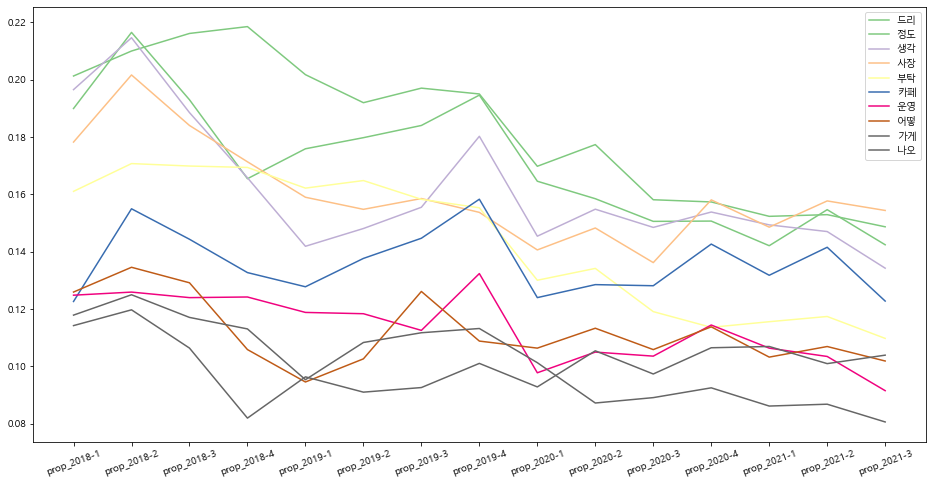

In [250]:
#ÏùòÎØ∏ÏóÜÏùå
temp = sortRank(quarterMerge)
sizeN = 10
temp.T.iloc[:, :sizeN].plot(figsize=(16, 8), cmap=plt.cm.Accent)
plt.xticks([i for i in range(len(temp.columns))], temp.columns, rotation=20)
plt.legend(loc='upper right')
plt.show()

# Íµ∞ÏßëÎ∂ÑÏÑù

In [157]:
%%time
from sklearn.cluster import KMeans
X = quarterMerge.set_index('token')
X_reduce = X.loc[((X==0).sum(axis=1) < 10)].apply(lambda x: (x - x.mean())/x.std(), axis=1) ######threshold
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_reduce)
X_reduce['label'] = kmeans.labels_
print(len(X_reduce))

876
Wall time: 1.01 s


In [160]:
ax=X_reduce.query('label<4').groupby('label').mean().T.plot(figsize=(16, 6), cmap=plt.cm.Accent, linewidth=3, style='-', alpha=0.2)
ax=X_reduce.query('label==4').groupby('label').mean().T.plot(ax=ax, color='Red', linewidth=4, style='--', alpha=1)
# X_reduce.query('label>3').groupby('label').mean().T.plot(ax=ax, cmap=plt.cm.Accent, linewidth=3, style='-', alpha=0.2)
plt.xticks([i for i in range(len(X_reduce.columns)-1)], X_reduce.columns[:-1], rotation=20)
plt.legend(loc='upper right', title='Íµ∞Ïßë')
plt.grid(alpha=0.3)
plt.title('ÏãúÍ∞ÑÏóê Îî∞Î•∏ Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑†DF', size=20)
plt.show()

In [162]:
X_reduce.reset_index().groupby('label')['token'].count()

label
0    249
1     74
2    218
3    164
4    171
Name: token, dtype: int64

In [161]:
i = 4
X.loc[X_reduce.query(f'label=={i}').iloc[:, :-1].index]
X_reduce.loc[X_reduce.query(f'label=={i}').iloc[:, :-1].index]

prop_2018-1  prop_2018-2  prop_2018-3  prop_2018-4  prop_2019-1  \
token                                                                     
ÏòÅÏóÖ         0.336893    -0.749950     0.163646    -1.133260    -0.486823   
Ï≤≠ÏÜå        -0.197554    -0.426372    -1.411120    -1.533073    -1.734678   
ÏµúÍ∑º        -0.290479     1.535166    -0.543495    -1.559139    -0.872120   
ÎäêÎÇå        -0.373306     1.639011    -1.640262    -1.611743    -1.350007   
Ï†ÑÌôî         0.052166    -0.019104     1.572566    -0.397482    -1.668039   
...             ...          ...          ...          ...          ...   
ÏùëÏõê        -0.770606    -0.770606    -0.770606    -0.770606    -0.770606   
ÏßÄÏõêÍ∏à       -0.710994    -0.710994    -0.710994    -0.710994    -0.710994   
Ïä§ÎßàÌä∏Ïä§ÌÜ†Ïñ¥    -0.781721    -0.781721    -0.781721    -0.781721    -0.781721   
Ïä§ÎßàÌä∏Ïä§ÌÜ†     -0.746356    -0.746356    -0.746356    -0.746356    -0.746356   
Ïä§Ïπ¥        -0.764672    -0.764672    -0.764672    -0.764672    -0.764672   

        prop_2019-2  prop_2019-3  prop_2019-4  prop_2020-1  prop_2020-2  \
token                                                                     
ÏòÅÏóÖ        -0.380758    -0.370609    -0.185198    -0.987090    -0.906497   
Ï≤≠ÏÜå         0.128358    -0.555630    -0.082929     0.851227     1.811956   
ÏµúÍ∑º        -1.313436     0.091325     0.115348    -1.258281    -0.239368   
ÎäêÎÇå        -0.169666    -0.353948     0.535181    -0.418041     0.197793   
Ï†ÑÌôî         0.309917    -1.195375    -0.563608    -1.499129    -0.138881   
...             ...          ...          ...          ...          ...   
ÏùëÏõê        -0.770606    -0.770606    -0.770606     0.784224    -0.770606   
ÏßÄÏõêÍ∏à       -0.710994    -0.710994    -0.710994    -0.710994     0.770996   
Ïä§ÎßàÌä∏Ïä§ÌÜ†Ïñ¥    -0.781721    -0.781721    -0.781721    -0.781721     1.272396   
Ïä§ÎßàÌä∏Ïä§ÌÜ†     -0.746356    -0.746356    -0.746356    -0.746356     0.343878   
Ïä§Ïπ¥        -0.764672    -0.764672    -0.764672    -0.764672     0.821198   

        prop_2020-3  prop_2020-4  prop_2021-1  prop_2021-2  prop_2021-3  label  
token                                                                           
ÏòÅÏóÖ        -0.024424     1.863615     2.395835    -0.181027     0.645648      4  
Ï≤≠ÏÜå         0.401123     0.759524     0.645990     0.797095     0.546084      4  
ÏµúÍ∑º         0.168933     1.079299     0.594416     1.116880     1.374950      4  
ÎäêÎÇå        -0.094153     1.096357     0.691930     0.983609     0.867244      4  
Ï†ÑÌôî        -0.184742     1.361078     1.429808     0.246007     0.694819      4  
...             ...          ...          ...          ...          ...    ...  
ÏùëÏõê         1.271692     1.688551     1.032207     1.376421     0.782363      4  
ÏßÄÏõêÍ∏à        0.316532     0.714099     2.040062     0.640585     1.916670      4  
Ïä§ÎßàÌä∏Ïä§ÌÜ†Ïñ¥     0.916116     1.400490     1.410342     1.114413     0.921734      4  
Ïä§ÎßàÌä∏Ïä§ÌÜ†      0.717990     1.804454     1.393952     1.488654     0.968278      4  
Ïä§Ïπ¥         0.681070     0.999376     1.103323     1.720909     1.556170      4  

[166 rows x 16 columns]

In [162]:
print(list(X_reduce.query(f'label=={i}').iloc[:, :-1].index))

['ÏòÅÏóÖ', 'Ï≤≠ÏÜå', 'ÏµúÍ∑º', 'ÎäêÎÇå', 'Ï†ÑÌôî', 'ÏòàÏïΩ', 'Í≥†Í∞ù', 'Îì§Ïñ¥Ïò§', 'ÎÑ§Ïù¥Î≤Ñ', 'ÌûòÎì§', 'ÌôòÎ∂à', 'ÏãúÍ∏∞', 'Ìï¥Îãπ', 'ÏòÅÌñ•', 'ÏûêÎèô', 'Í∏∞ÎåÄ', 'Îã¨Î¶¨', 'ÏßëÏ§ë', 'Í∏∞Îä•', 'ÏßÄÎÇòÍ∞Ä', 'ÌõÑÍ∏∞', 'ÏßÄÌÇ§', 'Ïù¥ÌõÑ', 'Ïò§Îäò', 'Ï†ÑÏ≤¥', 'Ìö®Í≥º', 'ÏßÄÍ∏â', 'Ïù∏Ìïò', 'Ï≤¥ÌÅ¨', 'Ï£ºÏùº', 'Îã®Í≥Ñ', 'Îî∞ÏßÄ', 'ÌôïÏù∏', 'Í±∞Î¶¨', 'ÎåÄÏÉÅ', 'Ïã†Ï≤≠', 'ÏùòÏûê', 'Î∞îÎã•', 'ÏùåÎ£å', 'Î≥¥ÎÇ¥', 'ÎÖ∏Ï∂ú', 'Ï∂îÍ∞Ä', 'Í∏∞Ï§Ä', 'Í±∏Î¶¨', 'ÏàòÎèÑ', 'Í∏∞Îã§Î¶¨', 'ÏßÑÏßú', 'ÌñâÎ≥µ', 'ÏûëÎÖÑ', 'Î∞îÍæ∏', 'ÏúÑÌÉÅ', 'ÎØ∏Îßå', 'Ïù¥Ï†Ñ', 'Ï†ïÎ∂Ä', 'Ï†úÌïú', 'Ï≤òÎ¶¨', 'ÎßàÍ∞ê', 'Î¨∏Ïûê', 'ÎèôÏùº', 'ÏõêÎûò', 'ÏôÄÏù¥ÌîÑ', 'ÌîºÌï¥', 'Í∏∞Î∂Ñ', 'ÏÑ§Ï†ï', 'ÏÑºÌÑ∞', 'Ïñ¥Ï©å', 'ÏáºÌïë', 'ÏÉàÎ≤Ω', 'Ïä§ÌÉÄ', 'Ï£ºÎ¨∏', 'ÌéòÏù¥ÏßÄ', 'Î∞∞ÏÜ°', 'Ìè¨Ïû•', 'Î∞∞Îã¨', 'ÌÑ∞ÏßÄ', 'ÌÉùÎ∞∞', 'ÌôîÏù¥ÌåÖ', 'ÏÜêÎãò', 'Ïã§Ïàò', 'Ìï†Ïù∏', 'ÏöîÏ≤≠', 'Î™®Îëê', 'ÌûòÎÇ¥', 'Î≤àÌò∏', 'Ïò¨Ìï¥', 'ÎàÑÎ•¥', 'ÌåêÎß§Ïûê', 'Ïù¥Î≤§Ìä∏', 'Î≤ÑÌã∞', 'Í≤∞Ï†ú', 'Îã®Í≥®', 'ÏÉÅÍ¥ÄÏóÜ', 'ÎÇ¥Ïùº', 'Ïû¨Î£å', 'Î∞ïÏä§', 'ÏïÑÏπ®', 'Ïñ¥Ï†ú',

In [378]:
sorted([len(txt) for txt in tokenizedDocs])[-20:]

[1142,
 1187,
 1276,
 1276,
 1290,
 1296,
 1318,
 1329,
 1373,
 1423,
 1583,
 1610,
 1779,
 2005,
 2080,
 2264,
 2547,
 3075,
 3962,
 10429]

In [164]:
gap_word = X.loc[X_reduce.query('label==4').index, ['prop_2018-1', 'prop_2021-3']].diff(axis=1)['prop_2021-3'].to_dict()
mask = np.array(Image.open('cloud.png'))

plt.figure(figsize=(16, 10))
wc = WordCloud(font_path='C:/Users/82105/Downloads/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf',
                background_color='white', 
               width=1600, height=600, 
               relative_scaling=0.7,
                colormap=plt.cm.RdGy, mask=mask[130:-130, 130:-130, 0])
wc = wc.generate_from_frequencies(gap_word)
plt.imshow(wc, interpolation='bilinear')
plt.title('ÎπàÎèÑÍ∞Ä Ï¶ùÍ∞ÄÌïú ÌÜ†ÌÅ∞ WordCloud', size=20)
plt.axis('off')
plt.tight_layout()
plt.show()

In [538]:
temp = df_refined[df_refined.content.str.contains('ÏßúÏ¶ù')]#.content.iloc[200]
print(temp.shape)
temp.groupby('quarter')[['id']].count()

(958, 10)


id
quarter     
2017-2    10
2017-3     7
2017-4    16
2018-1    18
2018-2    18
2018-3    18
2018-4    14
2019-1    21
2019-2    35
2019-3    26
2019-4    56
2020-1    45
2020-2    77
2020-3    99
2020-4    97
2021-1   123
2021-2   142
2021-3   125
2021-4    11

# ÎÑàÎ¨¥ Ï†ÅÍ≤å ÎÇòÏò§Îäî ÌÜ†ÌÅ∞Îì§ Ï†úÍ±∞
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
# Íµ∞ÏßëÎ≥Ñ Îã®Ïñ¥Îì§ Ï∂îÏ∂ú
# Î∂ÑÍ∏∞Î≥Ñ ÏãúÏ†úÏñ¥ ÌååÏïÖ

# Network

In [379]:
len(tokenizedDocs)

114920

In [79]:
%%time 
# tdm ÎßåÎì§Í∏∞
cv = CountVectorizer(analyzer= lambda x: x, min_df=0) ###### threshold
tdm = cv.fit_transform(tokenizedDocs)

Wall time: 4.87 s


In [78]:
type(lateTokenizedDocs), type(tokenizedDocs)

(list, list)

In [80]:
# node - weight ÎßåÎì§Í∏∞
from itertools import combinations as cb
freqCounter =Counter()
names = np.array(cv.get_feature_names())

for i in tqdm(range(tdm.shape[0])):
    tokens = names[(tdm[i].toarray()>1)[0]]
    c = cb(tokens, 2)
    freqCounter.update(c)

  0%|          | 0/114920 [00:00<?, ?it/s]

In [91]:
sorted(weightedNode, key=lambda x: x[1], reverse=True)[:10]

[(('Ïπ¥Ìéò', 'ÌÇ§Ïò§Ïä§ÌÅ¨'), 62),
 (('ÏóÖÏ≤¥', 'ÌÇ§Ïò§Ïä§ÌÅ¨'), 51),
 (('Ïä§ÌÑ∞Îîî', 'ÌÇ§Ïò§Ïä§ÌÅ¨'), 43),
 (('ÏÉùÍ∞Å', 'ÌÇ§Ïò§Ïä§ÌÅ¨'), 41),
 (('ÏÇ¨Ïö©', 'ÌÇ§Ïò§Ïä§ÌÅ¨'), 37),
 (('Ï†ïÎèÑ', 'ÌÇ§Ïò§Ïä§ÌÅ¨'), 36),
 (('Ïö¥ÏòÅ', 'ÌÇ§Ïò§Ïä§ÌÅ¨'), 36),
 (('ÎìúÎ¶¨', 'ÌÇ§Ïò§Ïä§ÌÅ¨'), 31),
 (('ÏãúÍ∞Ñ', 'ÌÇ§Ïò§Ïä§ÌÅ¨'), 28),
 (('Ï∞ΩÏóÖ', 'ÌÇ§Ïò§Ïä§ÌÅ¨'), 27)]

In [573]:
sorted(subWeightedNode, key=lambda x: x[1], reverse=True)[:10]

[(('ÏÉùÍ∞Å', 'Ï†ïÎèÑ'), 1576),
 (('ÏÇ¨Ïû•', 'ÏÉùÍ∞Å'), 1036),
 (('ÏÇ¨Îûå', 'ÏÉùÍ∞Å'), 1035),
 (('ÏÉùÍ∞Å', 'Ïπ¥Ìéò'), 1006),
 (('Îß§Ï∂ú', 'Ï†ïÎèÑ'), 966),
 (('ÏÉùÍ∞Å', 'ÏãúÍ∞Ñ'), 940),
 (('ÎìúÎ¶¨', 'Î∂ÄÌÉÅ'), 915),
 (('ÏÉùÍ∞Å', 'Ïö¥ÏòÅ'), 903),
 (('ÏÉùÍ∞Å', 'ÏãúÏûë'), 873),
 (('ÏÉùÍ∞Å', 'Ï∞ΩÏóÖ'), 861)]

In [172]:
nFreq = 10
keyword = 'Î¨¥Ïù∏'
sub = False

weightedNode = [(w, v) for w, v in freqCounter.items() if w[0]==keyword or w[1]==keyword]
if sub:
    subNode = [w[0] if w[1] == keyword else w[1] for w, v in weightedNode if v > nFreq*1.5]
    subWeightedNode = [(w, v) for w, v in freqCounter.items() 
                       if (w[0] in subNode or w[1] in subNode) 
                       and (w[0]!=keyword or w[1]!=keyword) 
                       and v > nFreq]


G = nx.Graph()

for (w1, w2), weight in weightedNode:
    if weight > nFreq:
        G.add_edge(w1, w2, weight=weight)

if sub:
    for (w1, w2), weight in subWeightedNode:
        if weight > nFreq:
            G.add_edge(w1, w2, weight=weight)

dgr = nx.degree_centrality(G)
pgr = nx.pagerank(G)

sorted_pgr = sorted(pgr.items(), key=lambda x: x[1], reverse=True)

G2 = nx.Graph()
for d in tqdm(dgr.items()):
    G2.add_node(d[0], nodesize=d[1])

    
for (w1, w2), weight in tqdm(weightedNode):
    if weight > nFreq:
        G2.add_weighted_edges_from([[w1, w2, weight]])
        
if sub:
    for (w1, w2), weight in tqdm(subWeightedNode):
        if weight > nFreq:
            G2.add_weighted_edges_from([[w1, w2, weight]])

        
sizes = [G2.nodes[node]['nodesize']*500 for node in G2]

options = {
    'edge_color' : '#FFDEA2',
    'width' : 1,
    'with_labels' : True,
    'font_weight' : 'regular'
}


plt.figure(figsize=(14, 14))
plt.title(f'Keyword: {keyword}', size=20)
fm._rebuild()
nx.draw(G2, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=100), **options,
        font_family='NanumGothic', font_size=20)
ax = plt.gca()
ax.collections[0].set_edgecolor('#555555')
plt.show()

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1571 [00:00<?, ?it/s]

In [ ]:
# tdm, corr = plot_network(tokenizedDocs)